In [21]:
#pip install pandas
#pip install matplotlib


In [30]:
import csv
import requests
import pandas as pd 
import io
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import time
import os

In [44]:
from pathlib import Path
path = 'cy_data'
pathToSave = 'diagrams/{}.png'
dir_list = sorted(os.listdir(path))
data  = list() # a list of dataframes containing all data from all cryp

Path(path).mkdir(parents=True, exist_ok=True)
Path(pathToSave).mkdir(parents=True, exist_ok=True)

## Etherium example

In [45]:
# https://www.alphavantage.co/documentation/#currency-daily
CSV_URL = 'https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=ETH&datatype=csv&market=USD&apikey=E7BF5XXE8WRMMDOD'
download = requests.Session().get(CSV_URL).content
eth = pd.read_csv(io.StringIO(download.decode('utf-8')))
eth.to_csv('cy_data/{}.csv'.format('ETH'), encoding='utf-8')

eth

,timestamp,open (USD),high (USD),low (USD),close (USD),open (USD).1,high (USD).1,low (USD).1,close (USD).1,volume,market cap (USD)
0,2021-08-29,3244.75,3258.49,3232.73,3252.79,3244.75,3258.49,3232.73,3252.79,1.029468e+04,1.029468e+04
1,2021-08-28,3273.89,3287.00,3210.31,3244.48,3273.89,3287.00,3210.31,3244.48,2.623603e+05,2.623603e+05
2,2021-08-27,3093.06,3280.00,3060.18,3273.45,3093.06,3280.00,3060.18,3273.45,4.510278e+05,4.510278e+05
3,2021-08-26,3226.88,3250.00,3053.30,3093.20,3226.88,3250.00,3053.30,3093.20,4.422985e+05,4.422985e+05
4,2021-08-25,3170.63,3248.00,3080.00,3226.87,3170.63,3248.00,3080.00,3226.87,4.836977e+05,4.836977e+05
...,...,...,...,...,...,...,...,...,...,...,...
995,2018-12-08,93.06,98.00,84.55,90.38,93.06,98.00,84.55,90.38,6.982171e+05,6.982171e+05
996,2018-12-07,91.18,96.90,82.07,93.05,91.18,96.90,82.07,93.05,1.030074e+06,1.030074e+06
997,2018-12-06,102.73,104.68,90.20,91.00,102.73,104.68,90.20,91.00,5.861386e+05,5.861386e+05
998,2018-12-05,109.92,110.58,102.38,102.71,109.92,110.58,102.38,102.71,3.540715e+05,3.540715e+05


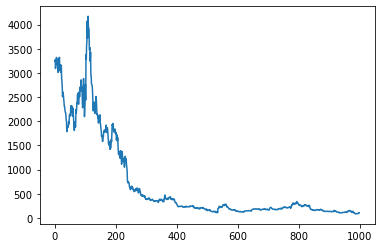

In [46]:
years = mdates.YearLocator()
years_fmt = mdates.DateFormatter('%Y')

fig, ax = plt.subplots()
#eth = eth.iloc[::-1]
ax.plot('open (USD)', data=eth.iloc[::-1])

plt.show()

## Bitcoin example

In [47]:
# https://www.alphavantage.co/documentation/#currency-daily
CSV_URL = 'https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=btc&datatype=csv&market=USD&apikey=E7BF5XXE8WRMMDOD'
download = requests.Session().get(CSV_URL).content
btc = pd.read_csv(io.StringIO(download.decode('utf-8')))

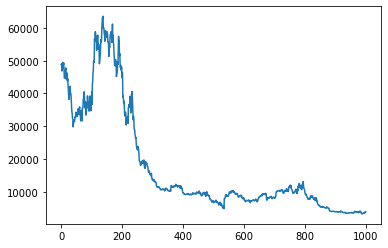

In [48]:
years = mdates.YearLocator()
years_fmt = mdates.DateFormatter('%Y')

fig, ax = plt.subplots()
ax.plot('open (USD)', data=btc)

plt.show()

# Get all courencies that are available (not all return values, some throw errors)

## Get the list od all available currencies

In [49]:
# https://www.alphavantage.co/documentation/#currency-daily
# https://www.alphavantage.co/documentation/#crypto-exchange
# https://www.alphavantage.co/digital_currency_list/
digital_currency_list = 'digital_currency_list.csv'
currencies = pd.read_csv(digital_currency_list) 
currencies.head()

,currency code,currency name
0,1ST,FirstBlood
1,2GIVE,GiveCoin
2,808,808Coin
3,AAVE,Aave
4,ABT,ArcBlock


## API Requests

To get here results for as many cryptoassets as possible, you need a premium Alpha Vantage Account

In [50]:
# https://www.alphavantage.co/documentation/#currency-daily
#data  = list() # a list of dataframes containing all data from all cryp
start_time = time.time()
i = 1
for c in currencies['currency code']: 
    print(c)
    
    #if i%6 == 0: # only 5 api calls per minute
    #    print('Waiting')
    #    time.sleep(65)
    
    CSV_URL = 'https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol={}&datatype=csv&market=USD&outputsize=full&apikey=E7BF5XXE8WRMMDOD'.format(c)
    
    download = requests.Session().get(CSV_URL).content
    df = pd.read_csv(io.StringIO(download.decode('utf-8')))
    df.to_csv('cy_data/{}.csv'.format(c), encoding='utf-8')
    #data.append(df)
    #i += 1
    
print("--- %s seconds ---" % (time.time() - start_time))  

1ST
2GIVE
808
AAVE
ABT
ABY
AC
ACT
ADA
ADT
ADX
AE
AEON
AGI
AGRS
AI
AID
AION
AIR
AKY
ALGO
ALIS
AMBER
AMP
AMPL
ANC
ANT
APPC
APX
ARDR
ARK
ARN
AST
ATB
ATM
ATOM
ATS
AUR
AVAX
AVT
B3
BAND
BAT
BAY
BBR
BCAP
BCC
BCD
BCH
BCN
BCPT
BCX
BCY
BDL
BEE
BELA
BET
BFT
BIS
BITB
BITBTC
BITCNY
BITEUR
BITGOLD
BITSILVER
BITUSD
BIX
BLITZ
BLK
BLN
BLOCK
BLZ
BMC
BNB
BNT
BNTY
BOST
BOT
BQ
BRD
BRK
BRX
BSV
BTA
BTC
BTCB
BTCD
BTCP
BTG
BTM
BTS
BTSR
BTT
BTX
BURST
BUSD
BUZZ
BYC
BYTOM
C20
CAKE
CANN
CAT
CCRB
CDT
CFI
CHAT
CHIPS
CLAM
CLOAK
CMP
CMT
CND
CNX
COFI
COMP
COSS
COVAL
CRBIT
CREA
CREDO
CRO
CRW
CSNO
CTR
CTXC
CURE
CVC
DAI
DAR
DASH
DATA
DAY
DBC
DBIX
DCN
DCR
DCT
DDF
DENT
DFS
DGB
DGC
DGD
DICE
DLT
DMD
DMT
DNT
DOGE
DOPE
DOT
DRGN
DTA
DTB
DYN
EAC
EBST
EBTC
ECC
ECN
EDG
EDO
EFL
EGC
EGLD
EKT
ELA
ELEC
ELF
ELIX
EMB
EMC
EMC2
ENG
ENJ
ENRG
EOS
EOT
EQT
ERC
ETC
ETH
ETHD
ETHOS
ETN
ETP
ETT
EVE
EVX
EXCL
EXP
FCT
FIL
FLDC
FLO
FLT
FRST
FTC
FTT
FUEL
FUN
GAM
GAME
GAS
GBG
GBX
GBYTE
GCR
GEO
GLD
GNO
GNT
GOLOS
GRC
GRT
GRS
GRWI
GTC
GTO
GUP
GVT
GXS
HBN
H

### How many requests retuned data? 

In [51]:
data, currencies_list, errors, notes, unknown = list(), list(), list(), list(), list()
for d in dir_list: 
    #df = pd.read_csv(io.StringIO(download.decode('utf-8')))
    df = pd.read_csv('{}/{}'.format(path, d))
    #print(d)
    if df.size == 0:
        print('Empty: {}'.format(d))
    elif '20' in df.iat[0, 1]:
        data.append(df)
        currencies_list.append(d.split(".")[0])
        #print('Yeah data')
    elif 'Error' in df.iat[0, 1]:
        errors.append(d.split(".")[0])
    elif 'Note' in df.iat[0, 1]:
        notes.append(d.split(".")[0])
    else:
        print('Crazy things are happening with {}'.format(d))
        unknown.append(df)
        
data[0].head()
print('--------Number of data: {}'.format(len(data)))   
#data[0].head()
print('--------Number of errors: {}'.format(len(errors)))  
#print(errors)
print('--------Number of notes: {}'.format(len(notes)))  
#print(notes)
print('--------Number of unknown: {}'.format(len(unknown)))  
#print(shit)

Empty: SPC.csv
--------Number of data: 106
--------Number of errors: 462
--------Number of notes: 0
--------Number of unknown: 0


### Rerun the following as long as there are still notes (to turn them into data)

In [52]:
# https://www.alphavantage.co/documentation/#currency-daily
#data  = list() # a list of dataframes containing all data from all cryp
i = 1
for c in notes: 
    print(c)
    
    #if i%6 == 0: # only 5 api calls per minute
    #    print('Waiting')
    #    time.sleep(65)
    
    CSV_URL = 'https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol={}&datatype=csv&market=USD&outputsize=full&apikey=E7BF5XXE8WRMMDOD'.format(c)
    
    download = requests.Session().get(CSV_URL).content
    df = pd.read_csv(io.StringIO(download.decode('utf-8')))
    print(df.head())
    df.to_csv('cy_data/{}.csv'.format(c), encoding='utf-8')
    #data.append(df)
    #i += 1
    
data[0].head()
print('--------Number of data: {}'.format(len(data)))   
#data[0].head()
print('--------Number of errors: {}'.format(len(errors)))  
#print(errors)
print('--------Number of notes: {}'.format(len(notes)))  
#print(notes)
print('--------Number of shit: {}'.format(len(unknown)))  
#print(shit)


--------Number of data: 106
--------Number of errors: 462
--------Number of notes: 0
--------Number of shit: 0


### How does the data of one currency look like? 

In [53]:
data[0]

,Unnamed: 0,timestamp,open (USD),high (USD),low (USD),close (USD),open (USD).1,high (USD).1,low (USD).1,close (USD).1,volume,market cap (USD)
0,0,2021-08-29,367.100,370.300,365.000,368.800,367.100,370.300,365.000,368.800,2484.9430,2484.9430
1,1,2021-08-28,372.600,375.900,361.700,367.200,372.600,375.900,361.700,367.200,64113.9120,64113.9120
2,2,2021-08-27,350.500,375.400,343.800,372.800,350.500,375.400,343.800,372.800,113318.6367,113318.6367
3,3,2021-08-26,384.170,389.300,340.900,350.700,384.170,389.300,340.900,350.700,112812.2271,112812.2271
4,4,2021-08-25,377.980,386.120,363.500,384.160,377.980,386.120,363.500,384.160,103418.2501,103418.2501
...,...,...,...,...,...,...,...,...,...,...,...,...
314,314,2020-10-19,40.820,41.000,35.912,35.980,40.820,41.000,35.912,35.980,86475.9360,86475.9360
315,315,2020-10-18,41.359,41.425,39.428,40.750,41.359,41.425,39.428,40.750,30917.9530,30917.9530
316,316,2020-10-17,39.371,43.235,38.206,41.365,39.371,43.235,38.206,41.365,41971.1430,41971.1430
317,317,2020-10-16,43.017,43.800,39.092,39.461,43.017,43.800,39.092,39.461,90836.4120,90836.4120
